In [1]:
import pandas as pd

In [2]:
인사평가 = pd.DataFrame(
    {'상반기' : [10, None, 50, 100],
    '하반기': [60, 80, 40, 100]})
인사평가

,상반기,하반기
0,10.0,60
1,NaN,80
2,50.0,40
3,100.0,100


# 결측치

### isna()

isnull()로도 사용됨

In [17]:
인사평가.isna()

,상반기,하반기
0,False,False
1,True,False
2,False,False
3,False,False


- any

In [12]:
# help(인사평가.isna().any())
# |      DataFrame.any : Return whether any element is True over requested axis.


In [14]:
인사평가.isna().any()

상반기     True
하반기    False
dtype: bool

axis = 변화하는 차원

In [6]:
인사평가.isna().any(axis=0)

상반기     True
하반기    False
dtype: bool

> axis의 디폴트값은 0

In [80]:
인사평가.isna()

,상반기,하반기
0,False,False
1,True,False
2,False,False
3,False,False


In [78]:
인사평가.isna().shape

(4, 2)

나는 컬럼별로 어떤 컬럼이 결측치를 가지는 지 알고 싶어  
-> 그러면 컬럼은 살아 있어야겠다  
-> 그러면 현재 컬럼은 2개니깐 데이터의 shape은 (?, 2) 이렇게 되어야 겠네  
-> 아 그러면 변화하는 차원은 0번째니깐 axis=0으로 넣자  

In [81]:
인사평가.isna().any(axis=0)

상반기     True
하반기    False
dtype: bool

In [79]:
인사평가.isna().any(axis=0).shape

(2,)

(4, 2)-> (2,)   
아하 4가 변했네  
4는 0번째니깐 axis=0으로 하는게 맞네!  

In [7]:
인사평가.isna().any(axis=1)

0    False
1     True
2    False
3    False
dtype: bool

In [1]:
인사평가.isna().sum().sum()

NameError: name '인사평가' is not defined

## Datasets 01

In [49]:
df = pd.read_csv('../Datasets/Dataset_01.csv')
df

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


### Q1. 데이터 세트 내에 총 결측값의 개수는 몇 개인가? (답안 예시) 23

In [50]:
df.isna().sum().sum()

26

In [51]:
# 정답: 26

### fillna()

In [25]:
인사평가.fillna(20)

,상반기,하반기
0,10.0,60
1,10.0,80
2,50.0,40
3,100.0,100


In [26]:
인사평가

,상반기,하반기
0,10.0,60
1,NaN,80
2,50.0,40
3,100.0,100


### dropna()

- 기본적으로 결측이 하나라도 있으면 row가 삭제됨

In [26]:
인사평가.dropna()

,상반기,하반기
0,10.0,60
2,50.0,40
3,100.0,100


In [27]:
인사평가.dropna(axis=0)

,상반기,하반기
0,10.0,60
2,50.0,40
3,100.0,100


In [28]:
인사평가.dropna(axis=1)

,하반기
0,60
1,80
2,40
3,100


# Tabular descriptive statistics

## 도수분포표

frequency table: 데이터를 구간으로 나누어, 각 구간의 빈도를 나타낸 표

In [54]:
#
인적사항 = pd.DataFrame({'혈액형':['A', 'A',  'B', 'AB'],'성별':['f','m','m','f',]})
인적사항

,혈액형,성별
0,A,f
1,A,m
2,B,m
3,AB,f


In [59]:
인적사항.혈액형.value_counts()

혈액형
A     2
B     1
AB    1
Name: count, dtype: int64

In [60]:
인적사항.혈액형.value_counts(normalize=True)*100

혈액형
A     50.0
B     25.0
AB    25.0
Name: proportion, dtype: float64

In [57]:
인적사항.value_counts()

혈액형  성별
A    f     1
     m     1
AB   f     1
B    m     1
Name: count, dtype: int64

In [58]:
인적사항[['혈액형','성별']].value_counts()

혈액형  성별
A    f     1
     m     1
AB   f     1
B    m     1
Name: count, dtype: int64

## DataSet 02 - 1번

In [52]:
df = pd.read_csv('../Datasets/Dataset_02.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## Q1.

In [63]:
df[["Sex","BP","Cholesterol"]].value_counts(normalize=True)

Sex  BP      Cholesterol
F    HIGH    NORMAL         0.105
M    HIGH    NORMAL         0.105
     LOW     NORMAL         0.095
     NORMAL  HIGH           0.095
F    NORMAL  HIGH           0.090
M    HIGH    HIGH           0.090
F    HIGH    HIGH           0.085
M    LOW     HIGH           0.085
F    LOW     HIGH           0.070
             NORMAL         0.070
     NORMAL  NORMAL         0.060
M    NORMAL  NORMAL         0.050
Name: proportion, dtype: float64

In [61]:
# 정답: 0.105

## 교차분석표, 교차표
Cross tables, contingency(우연성) tables

### pd.crosstab()

In [39]:
df=pd.read_csv('../Datasets/Patients.csv')
df

,환자번호,당뇨 여부,비만 여부
0,1,Y,N
1,2,N,Y
2,3,N,N
3,4,N,N
4,5,N,Y
...,...,...,...
95,96,N,N
96,97,N,N
97,98,Y,N
98,99,N,N


In [40]:
pd.crosstab(df['당뇨 여부'], df['비만 여부'])

비만 여부,N,Y
당뇨 여부,,
N,62,22
Y,12,4


- 전체 대비 해당 빈도 비율
    - Normalize by dividing all values by the sum of values.


In [69]:
pd.crosstab(index=df['당뇨 여부'], columns=df['비만 여부'], normalize=True)

비만 여부,N,Y
당뇨 여부,,
N,0.62,0.22
Y,0.12,0.04


## DataSet 02 - 1번

q. crosstab을 이용해서 풀어보아라

In [52]:
df = pd.read_csv('../Datasets/Dataset_02.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [62]:
pd.crosstab([df.Sex, df.BP], df.Cholesterol, normalize=True)

Cholesterol   HIGH  NORMAL
Sex BP                    
F   HIGH     0.085   0.105
    LOW      0.070   0.070
    NORMAL   0.090   0.060
M   HIGH     0.090   0.105
    LOW      0.085   0.095
    NORMAL   0.095   0.050

- 전체 대비 해당 빈도 비율 + margin

In [8]:
df=pd.read_csv('../Datasets/Patients.csv')
df.head()

,환자번호,당뇨 여부,비만 여부
0,1,Y,N
1,2,N,Y
2,3,N,N
3,4,N,N
4,5,N,Y


In [71]:
pd.crosstab(df['당뇨 여부'], df['비만 여부'], normalize=True, margins=True)

비만 여부,N,Y,All
당뇨 여부,,,
N,0.62,0.22,0.84
Y,0.12,0.04,0.16
All,0.74,0.26,1.00


- row 기준 해당 빈도 비율 + margin
    - If passed 'index' will normalize over each row.

In [53]:
pd.crosstab(df['당뇨 여부'], df['비만 여부'], normalize='index', margins=True)

비만 여부,N,Y
당뇨 여부,,
N,0.738095,0.261905
Y,0.750000,0.250000
All,0.740000,0.260000


In [73]:
pd.crosstab(df['당뇨 여부'], df['비만 여부'], normalize=0, margins=True)

비만 여부,N,Y
당뇨 여부,,
N,0.738095,0.261905
Y,0.750000,0.250000
All,0.740000,0.260000


당뇨 여부 N이 100%일 때(당뇨 여부가 N일때) 비만 여부의 비율을 구할 수 있다.   
당뇨 여부 Y가 100%일 때 비만 여부의 비율을 구할 수 있다. 

- column 기준 해당 빈도 비율 + margin

In [74]:
pd.crosstab(df['당뇨 여부'], df['비만 여부'], normalize=1, margins=True)
# pd.crosstab(df['당뇨 여부'], df['비만 여부'], normalize='columns', margins=True)

비만 여부,N,Y,All
당뇨 여부,,,
N,0.837838,0.846154,0.84
Y,0.162162,0.153846,0.16


비만 여부 N이 100%일 때 당뇨 여부의 비율을 구할 수 있다.   
비만 여부 Y가 100%일 때 당뇨 여부의 비율을 구할 수 있다. 

# 참고)Graphical descriptive statistics#1/2

변수 유형(Categorical Variable, Numerical Variables)에 따라  기술 통계 방법이 달라짐  
- Categorical Variable
    - 히스토그램, 막대그래프, 파이차트 등
- Numerical Variables
    - 선 그래프, 산점도, 줄기 잎 그림 등

 > 시험에서 코드를 입력할 필요는 없지만 그림을 보고 해석은 할 수 있어야 한다

Pandas는 `plot`이라는 시각화 메서드(함수)를 내장. 

`plot`은 matplotlib(시각화 전문 패키지)를 내부에서 임포트됨

In [5]:
#
타이타닉=pd.read_csv('../Datasets/titanic_train.csv')
타이타닉.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 히스토그램 & 분포

- histogram: 도수분포표를 그래프로 그린 것
- `자료의 분포` 알 수 있음
- 연속 변수→ 계급값 나누기 → 도수분포표 → 히스토그램

### plot.hist()

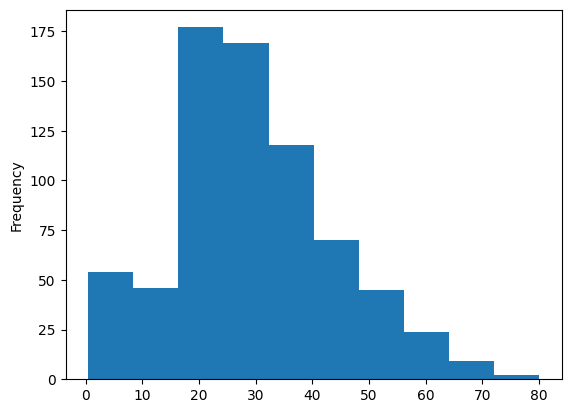

In [43]:
타이타닉.Age.plot.hist();
#타이타닉.Age.plot(kind='hist')

- 계급값 개수 정하기

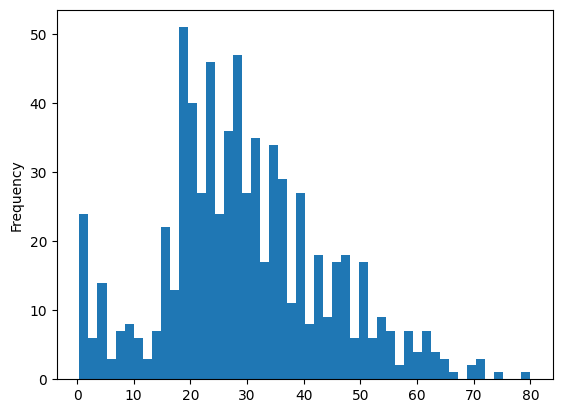

In [44]:
타이타닉.Age.plot.hist(bins=50);

### plot.density()

- 확률 밀도 함수(PDF, Probability Density Function)
    - 연속확률변수의 분포를 나타내는 연속확률분포에서 특정 구간의 확률을 나타내기 위한 함수.

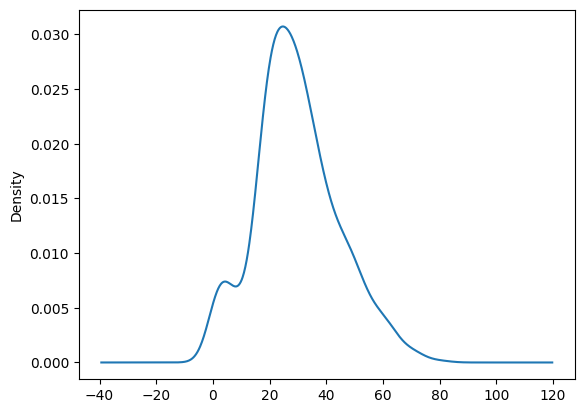

In [45]:
타이타닉.Age.plot.density();

## 막대그래프

### plot.bar()

In [14]:
타이타닉.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
타이타닉_성별 = 타이타닉.Sex.value_counts()
타이타닉_성별

Sex
male      577
female    314
Name: count, dtype: int64

In [16]:
type(타이타닉_성별)

pandas.core.series.Series

<Axes: xlabel='Sex'>

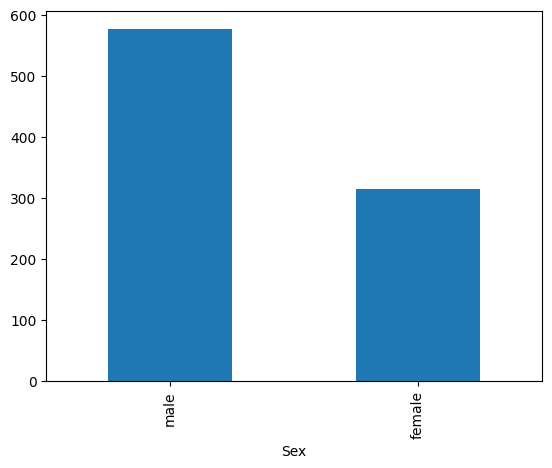

In [17]:
타이타닉_성별.plot.bar()

Series 객체의 색인은 그래프를 생성할 때 X축으로 해석

### plot.barh()

<Axes: ylabel='Sex'>

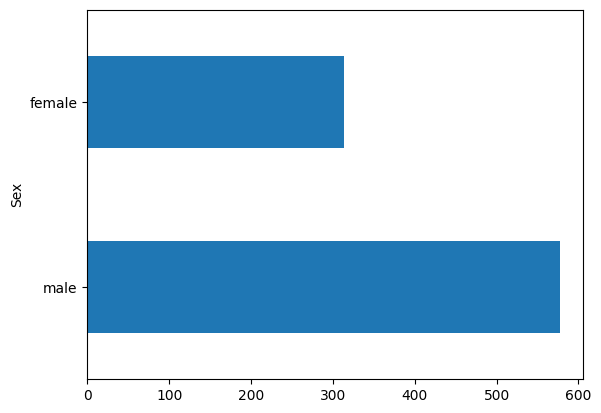

In [18]:
타이타닉_성별.plot.barh()

- 남녀별 생존률 구하기
    - 각 성별을 100%로 구하기

In [11]:
타이타닉_생존=pd.crosstab(타이타닉.Sex, 타이타닉.Survived, normalize='index')
타이타닉_생존

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


<Axes: ylabel='Sex'>

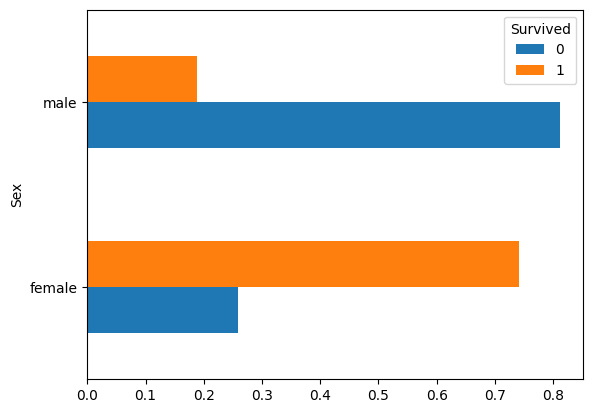

In [12]:
타이타닉_생존.plot.barh()

<Axes: ylabel='Sex'>

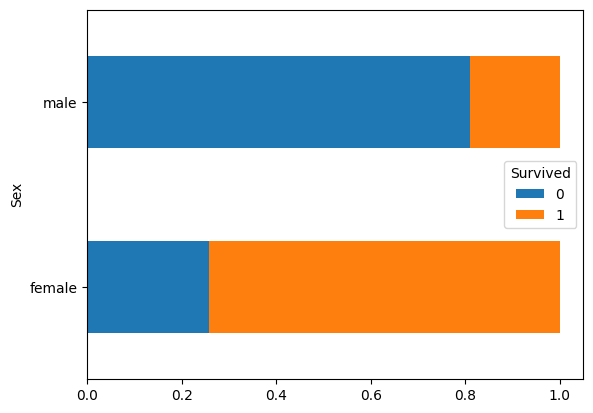

In [13]:
타이타닉_생존.plot.barh(stacked=True)

> 이 그림 자주 등장 q. 전체 male중 survived된 비율은?소수점 둘째자리까지만 기입(답안 예시: 0.21)

In [6]:
pd.crosstab(타이타닉.Sex, 타이타닉.Survived, normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


q. 크로스탭을 사용하지 않고 len을 이용해서 구하여라

In [8]:
len(타이타닉.loc[타이타닉.Sex=='male'])

577

In [10]:
타이타닉.Survived.unique()

array([0, 1], dtype=int64)

In [15]:
len(타이타닉.loc[(타이타닉.Sex=='male')&(타이타닉.Survived==1)])

109

In [16]:
len(타이타닉.loc[(타이타닉.Sex=='male')&(타이타닉.Survived==1)])/len(타이타닉.loc[타이타닉.Sex=='male'])

0.18890814558058924

## 파이 차트

### plot.pie()

In [57]:
타이타닉_승선항=타이타닉.Embarked.value_counts()
타이타닉_승선항

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: ylabel='count'>

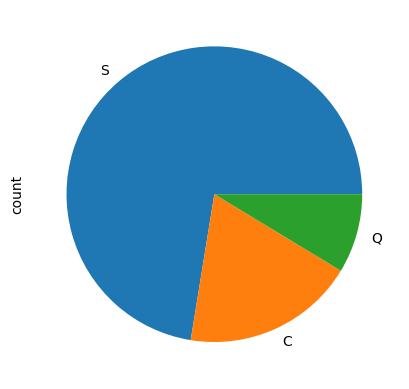

In [58]:
타이타닉_승선항.plot.pie()

<Axes: ylabel='count'>

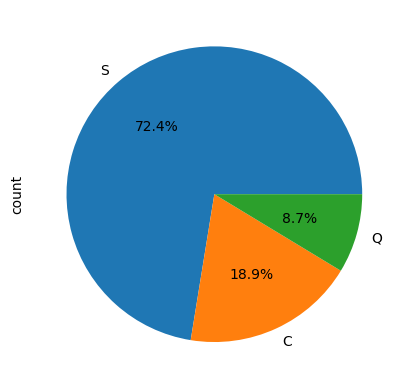

In [73]:
타이타닉_승선항.plot.pie(autopct='%.1f%%')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
# 아래쪽 example 참고

## 선 그래프

- 시간에 따른 자료의 변화나 추세를 파악하는데 적절
- 가로축은 보통 `시간`

### plot.line()

In [74]:
#
df = pd.DataFrame({
   'pig': [20, 18, 489, 675, 1776],
   'horse': [4, 25, 281, 600, 1900]
   }, index=[1990, 1997, 2003, 2009, 2014])
df

,pig,horse
1990,20,4
1997,18,25
2003,489,281
2009,675,600
2014,1776,1900


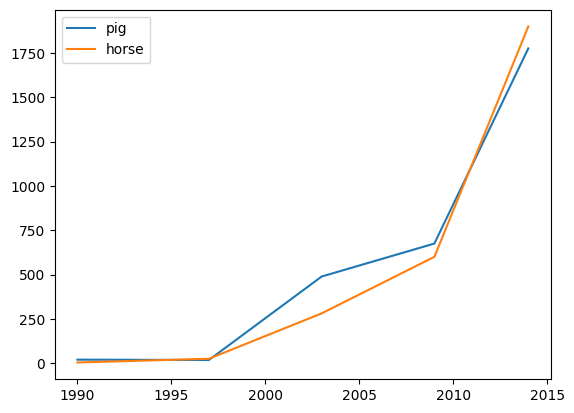

In [75]:
df.plot.line();

## 산점도

산포도, 스캐터 플랏

x,y 두 변수의 흩어진 정도를 시각화

### plot.scatter()

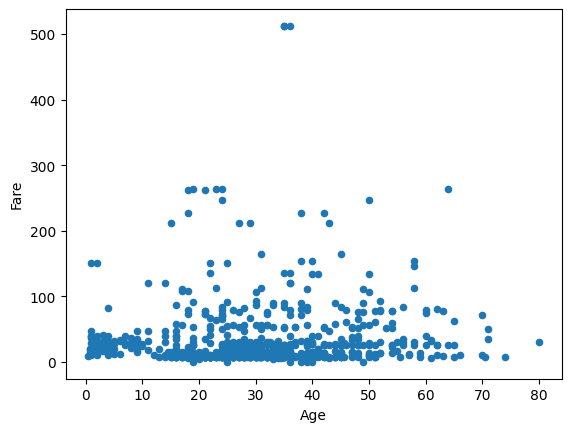

In [76]:
타이타닉.plot.scatter(x='Age',y='Fare');

Q. 비싼 티켓(400이상)을 사신 분은 구조(생존)되셨을까?

In [37]:
타이타닉[타이타닉.Fare>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [38]:
타이타닉.loc[타이타닉.Fare>500, 'Survived']

258    1
679    1
737    1
Name: Survived, dtype: int64

> ㅠ 돈을 많이 벌어야 하네요

- 생존여부 스캐터 플랏에 표시

In [33]:
# adding 'color' column
타이타닉['color']=타이타닉.Survived.map(lambda x: 'green' if x==0 else 'blue')

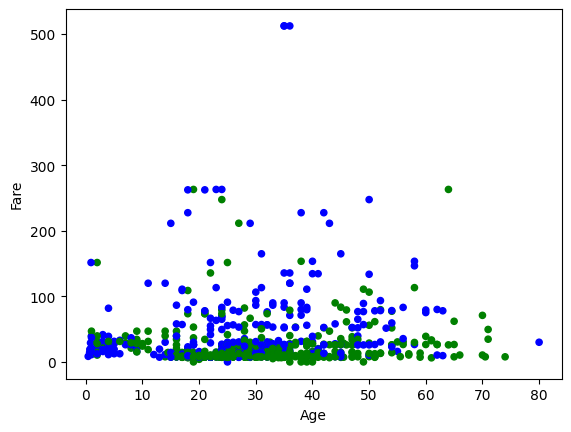

In [34]:
타이타닉.plot.scatter(x='Age',y='Fare', c='color');

# Numerical descriptive statistics

Aggregation 함수(min, max, sum, count 등) 사용

판다스는 기본적으로 결측값 NaN(Not a Number, None)을 제외하고 계산됨

## Measures of central tendency 중심 경향 척도-mean median mode

### - mean()
NaN을 제외한 평균

In [35]:
타이타닉.Age.mean()

29.69911764705882

In [37]:
타이타닉.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  color        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [39]:
타이타닉_num = 타이타닉.select_dtypes(include='number')

In [41]:
타이타닉_num.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

### - median()
NaN을 제외한 중앙값

In [42]:
타이타닉.Age.median()

28.0

### - mode()
NaN을 제외한 최빈값

In [40]:
타이타닉.Age.mode()

0    24.0
Name: Age, dtype: float64

In [41]:
타이타닉.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [63]:
타이타닉.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [67]:
타이타닉.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

## Measures of variability/dispersion 변동성 척도-분산 표편 사분위수 변동계수

In [62]:
# 타이타닉=pd.read_csv('../Datasets/titanic_train.csv')

### var()
NaN을 제외한 분산

In [64]:
타이타닉.Age.var()

211.01912474630802

### std()
NaN을 제외한 표준 편차

In [65]:
타이타닉.Age.std()

14.526497332334042

### quantile() 백분위수

NaN을 제외한 표준 편차

q. 타이타닉의 Age의 85백분위수는?

In [183]:
타이타닉.Age.quantile(0.85)

45.0

- 사용자 정의함수

In [190]:
#참고
def calculate_quantile(data, q):
    sorted_data = sorted(data.dropna())  # 데이터를 리스트로 정렬합니다.
    index = (len(sorted_data) - 1) * q  # 분위수에 해당하는 인덱스를 계산합니다. #7.6499 파이썬은 0부터 시작
    floor = int(index // 1)  # 분위수에 해당하는 인덱스의 정수 부분을 가져옵니다. #7
    ceil = int(index // 1 + 1)  # 분위수에 해당하는 인덱스의 올림 값을 가져옵니다. #8
    fraction = index % 1  # 분위수에 해당하는 인덱스의 소수 부분을 가져옵니다. #0.649
    
    if floor == ceil:  # 분위수에 해당하는 인덱스가 정수인 경우
        quantile_value = sorted_data[floor]
    else:  # 분위수에 해당하는 인덱스가 정수가 아닌 경우
        quantile_value = sorted_data[floor] + (sorted_data[ceil]-sorted_data[floor])*fraction

    return quantile_value

In [191]:
calculate_quantile(타이타닉.Age, 0.85)

45.0

- 대략적으로 구하기

In [3]:
import pandas as pd

In [4]:
#
t=pd.Series([4]*10+[1]*20+[3]*20+[10]*40).sort_values()
print(list(pd.Series([4]*10+[1]*20+[3]*20+[10]*40).sort_values()))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [224]:
len(t)*0.85

76.5

In [225]:
t.iloc[76]

10

In [226]:
t.quantile(0.85)

10.0

> 데이터가 많아지면 앞뒤로 다 같은 숫자일 확률이 무지 높다. 이걸 이용해보자

q. 타이타닉의 Age의 85백분위수는? quantile함수을 잊어버렸다고 가정하고 빨리 풀어보자

In [192]:
s_age_sort=타이타닉.Age.dropna().sort_values()

In [212]:
(len(s_age_sort))*0.85

606.9

In [213]:
s_age_sort.iloc[606]

45.0

In [227]:
타이타닉.Age.quantile(0.85)

45.0

# datasets 13 - 2

## Q2 두번째 조건까지만 풀어봅시다

In [17]:
df = pd.read_csv('../Datasets/Dataset_13_train.csv')

In [18]:
df.major_discipline.unique()

array(['STEM', 'Business Degree', 'Arts', 'Humanities', 'Other'],
      dtype=object)

In [19]:
df = df[df.major_discipline=='STEM']

In [24]:
df['city_development_index'].quantile(0.85)

0.939

In [20]:
df2=df[df.city_development_index>df['city_development_index'].quantile(0.85)]

In [21]:
df2.shape

(145, 10)

In [228]:
#꼼수사용
len(df.city_development_index.dropna())*0.85
my_q=df.city_development_index.sort_values().iloc[1095]
my_q

0.939

## Measure of association 연관성 척도- 공분산 상관계수

### cov()

In [52]:
타이타닉[['Age','Fare']].cov()

,Age,Fare
Age,211.019125,73.849030
Fare,73.849030,2469.436846


In [51]:
타이타닉_num.cov()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,66231.000000,-0.626966,-7.561798,138.696504,-16.325843,-0.342697,161.883369
Survived,-0.626966,0.236772,-0.137703,-0.551296,-0.018954,0.032017,6.221787
Pclass,-7.561798,-0.137703,0.699015,-4.496004,0.076599,0.012429,-22.830196
Age,138.696504,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
SibSp,-16.325843,-0.018954,0.076599,-4.163334,1.216043,0.368739,8.748734
Parch,-0.342697,0.032017,0.012429,-2.344191,0.368739,0.649728,8.661052
Fare,161.883369,6.221787,-22.830196,73.849030,8.748734,8.661052,2469.436846


### corr()
NaN을 제외한 상관계수

In [50]:
타이타닉_num.corr()
# 타이타닉.corr() 안됨

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Measures of Shape 모양 척도 - 왜도 첨도

q. 타이타닉의 Fare의 왜도 값을 쓰세요

### skew()
왜도

In [58]:
타이타닉['Fare'].skew()

4.787316519674893

In [54]:
타이타닉_num.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

### kurt()
첨도

In [59]:
타이타닉['Fare'].kurt()

33.39814088089868

In [60]:
타이타닉_num.kurt()

PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.178274
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

## 데이터 요약

In [6]:
#
타이타닉=pd.read_csv('../Datasets/titanic_train.csv')
타이타닉.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### - sum
NaN을 제외한 합

In [36]:
타이타닉.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
(타이타닉.Embarked=='S').sum(axis=0)
# (타이타닉.Embarked=='S').sum(axis=1) 시리즈라 axis사실 필요없음 1로 하면 에러

644

In [27]:
타이타닉[['SibSp','Parch']]

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
886,0,0
887,0,0
888,1,2
889,0,0


In [63]:
타이타닉[['SibSp','Parch']].sum(axis=0)

SibSp    466
Parch    340
dtype: int64

In [64]:
타이타닉[['SibSp','Parch']].sum(axis=1)

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

q. 타이타닉[['SibSp','Parch']]에서 element가 1인 데이터를 축에 따라 합을 각각 구해보아라

In [ ]:
타이타닉[['SibSp','Parch']].apply(lambda x: x==1).sum(axis=0)

In [34]:
타이타닉[['SibSp','Parch']].apply(lambda x: x==1).sum(axis=0)
# 타이타닉[['SibSp','Parch']].applymap(lambda x: x==1).sum(axis=0)

SibSp    209
Parch    118
dtype: int64

In [35]:
타이타닉[['SibSp','Parch']].apply(lambda x: x==1).sum(axis=1)

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Length: 891, dtype: int64

Q.
SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수  
Parch : 동반한 Parent(부모) Child(자식)의 수  
두 변수 중에 하나라도 동반자가 없는 유람선 승객수는?
ex) SibSp=0 Parch=1 -> 카운트 1

In [20]:
타이타닉[['SibSp','Parch']].apply(lambda x: x==0)

,SibSp,Parch
0,False,True
1,False,True
2,True,True
3,False,True
4,True,True
...,...,...
886,True,True
887,True,True
888,False,False
889,True,True


In [21]:
타이타닉[['SibSp','Parch']].apply(lambda x: x==0).sum(axis=1)

0      1
1      1
2      2
3      1
4      2
      ..
886    2
887    2
888    0
889    2
890    2
Length: 891, dtype: int64

In [22]:
타이타닉[['SibSp','Parch']].apply(lambda x: x==0).sum(axis=1)>0

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Length: 891, dtype: bool

In [15]:
(타이타닉[['SibSp','Parch']].apply(lambda x: x==0).sum(axis=1)>0).sum()

749

Q. 남자 중 생존한 확률을 소수 둘째자리까지 표시하라(소수 셋째자리에서 반올림), crosstab,len 사용하지 말고 sum을 이용해서 구하라

<Axes: ylabel='Sex'>

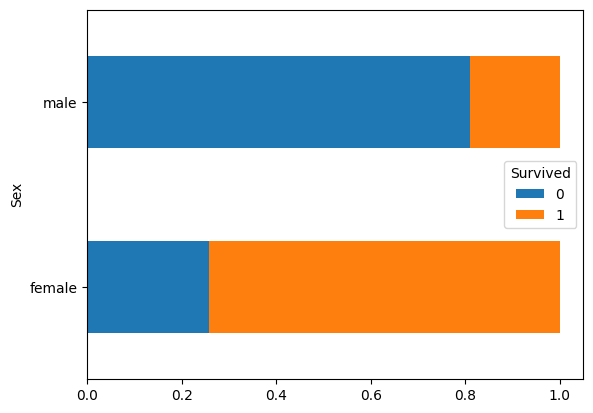

In [17]:
#
# 타이타닉_생존=pd.crosstab(타이타닉.Sex, 타이타닉.Survived, normalize='index')
타이타닉_생존.plot.barh(stacked=True)

In [27]:
#
len(타이타닉[타이타닉.Sex=='male'])
# 타이타닉[타이타닉.Sex=='male'].shape[0]

577

In [23]:
(타이타닉.Sex=='male').sum()

577

In [232]:
male_1=((타이타닉.Sex=='male')&(타이타닉.Survived==1)).sum(axis=0)

In [233]:
남자생존확률=male_1/(타이타닉.Sex=='male').sum()

In [236]:
남자생존확률.round(2)

0.19

In [231]:
# len으로 푸는 법
# len(타이타닉.loc[(타이타닉.Sex=='male')&(타이타닉.Survived==1)])/len(타이타닉.loc[타이타닉.Sex=='male'])

0.18890814558058924

### - count()
NaN 값을 제외한 원소의 개수 

In [4]:
타이타닉.shape

(891, 12)

In [5]:
타이타닉.Cabin.count()

204

q. count,info 함수를 사용하지 않고 Cabin의 결측치가 제외된 행의 수인 204가 나오게 하시오. 5m

In [6]:
타이타닉.Cabin.isna()

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [7]:
n_na = 타이타닉.Cabin.isna().sum(axis=0)

In [8]:
n_na

687

In [93]:
타이타닉.shape[0] - n_na

204

In [4]:
(~타이타닉.Cabin.isna()).sum(axis=0)

204

## 그룹 함수 groupby

- 평균

In [10]:
타이타닉.groupby(by='Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

- 분산

In [11]:
타이타닉.groupby(by='Sex')['Age'].var()

Sex
female    199.096233
male      215.449579
Name: Age, dtype: float64

q. 호불호가 극명하게 나뉘는 영화를 찾아보자.  3m

In [4]:
# import pandas as pd

In [5]:
#
영화 = pd.DataFrame(
    {'title' : ['인터스텔라', '인터스텔라', '인터스텔라', '반지의제왕','반지의제왕','반지의제왕','반지의제왕'],
    'rating': [60, 80, 40, 100, 90, 80, 90]})
영화

,title,rating
0,인터스텔라,60
1,인터스텔라,80
2,인터스텔라,40
3,반지의제왕,100
4,반지의제왕,90
5,반지의제왕,80
6,반지의제왕,90


In [6]:
영화.groupby(by='title')['rating'].std()

title
반지의제왕     8.164966
인터스텔라    20.000000
Name: rating, dtype: float64

### a. 인터스텔라    

# Dataset 6-1

In [4]:
# import pandas as pd

In [5]:
df= pd.read_csv('../Datasets/Dataset_06.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2597000006,20150309T000000,347500.0,3,1.50,1180,8353,1.0,0,0,3,7,1180,0,1960,0,98155,1710,8748
1,8813400345,20150414T000000,575000.0,2,1.00,980,3663,1.0,0,0,5,7,980,0,1909,0,98105,1620,3706
2,226059106,20150102T000000,489500.0,3,1.75,2090,65558,1.0,0,0,3,8,1330,760,1977,0,98072,2450,47178
3,8645500270,20141028T000000,246000.0,4,1.75,1720,7455,1.0,0,0,4,7,1020,700,1963,0,98058,1720,7700
4,7010700550,20141114T000000,595000.0,3,2.50,2030,5100,2.0,0,0,3,7,2030,0,2008,0,98199,1790,4380


### Q6-1. groupby로 풀어보시오

In [9]:
#기존 방법
print(df.waterfront.unique())
group0 = df[df.waterfront==0]['price'].mean()
group1 = df[df.waterfront==1]['price'].mean()
print(int(abs(group1-group0)))

[0 1]
1167272


In [10]:
#다른 방법 groupby
df.groupby('waterfront')['price'].mean()

waterfront
0    5.321651e+05
1    1.699438e+06
Name: price, dtype: float64

In [14]:
int(abs(df.groupby('waterfront')['price'].mean()[0]-df.groupby('waterfront')['price'].mean()[1]))

1167272

In [136]:
#다른 답
int(df.groupby('waterfront')['price'].mean().abs().diff()[1])

1167272

In [142]:
# 정답: 1167272

## Dataset 04 - 1번

In [41]:
df = pd.read_csv('../Datasets/Dataset_04.csv')
df

,LOCATION,SUBJECT,TIME,Value
0,AUS,BEEF,1991,27.721815
1,AUS,BEEF,1992,26.199591
2,AUS,BEEF,1993,26.169094
3,AUS,BEEF,1994,25.456134
4,AUS,BEEF,1995,25.340226
...,...,...,...,...
6713,EU28,SHEEP,2022,2.012270
6714,EU28,SHEEP,2023,2.018727
6715,EU28,SHEEP,2024,2.026332
6716,EU28,SHEEP,2025,2.034105


## Q1. 

In [76]:
df = df[df.LOCATION=='KOR']

In [85]:
time_groupby=df.groupby('TIME')['Value'].sum()

In [96]:
time_groupby

TIME
1990     5.774255
1991    21.911207
1992    26.901769
1993    26.938255
1994    27.877341
1995    30.042035
1996    31.928922
1997    32.002991
1998    30.009057
1999    35.383138
2000    34.957160
2001    35.336550
2002    37.162442
2003    39.471677
2004    35.171424
2005    36.617273
2006    41.910995
2007    43.690430
2008    43.941183
2009    43.336372
2010    46.412261
2011    46.799325
2012    46.128025
2013    49.496899
2014    53.274723
2015    55.254123
2016    55.665778
2017    55.885227
2018    56.146592
2019    56.394942
2020    56.643664
2021    56.900853
2022    57.194312
2023    57.491758
2024    57.781372
2025    58.083483
2026    58.392009
Name: Value, dtype: float64

In [98]:
time_groupby.reset_index()

,TIME,Value
0,1990,5.774255
1,1991,21.911207
2,1992,26.901769
3,1993,26.938255
4,1994,27.877341
5,1995,30.042035
6,1996,31.928922
7,1997,32.002991
8,1998,30.009057
9,1999,35.383138


In [99]:
time_groupby.reset_index().corr()

,TIME,Value
TIME,1.000000,0.960124
Value,0.960124,1.000000


- 추가! 그룹바이에 함수 적용

In [7]:
영화.groupby('title').apply(lambda x : len(x))

title
반지의제왕    4
인터스텔라    3
dtype: int64

## 문제 08 유형 (DataSet_08.csv)

In [4]:
df = pd.read_csv('../../Datasets/Dataset_08.csv')
df.head(2)

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


## Q1

In [8]:
df['State'].value_counts(normalize=True).sort_index().values

array([0.34, 0.32, 0.34])

In [7]:
# 다른 방법
df.groupby('State').apply(lambda x : len(x))

State
California    17
Florida       16
New York      17
dtype: int64

In [165]:
df.groupby('State').apply(len)

State
California    17
Florida       16
New York      17
dtype: int64

In [166]:
df.groupby('State').apply(len) / len(df)

State
California    0.34
Florida       0.32
New York      0.34
dtype: float64

In [ ]:
# 정답: 0.34, 0.32, 0.34

# 피벗

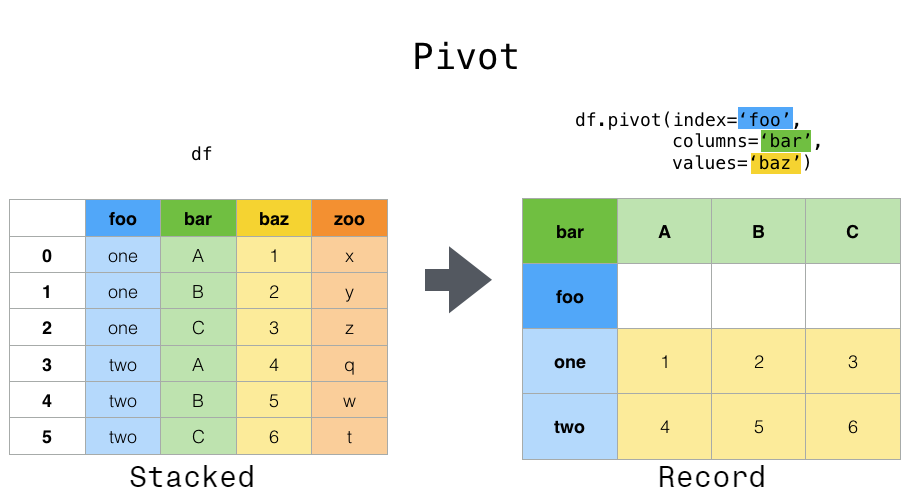

- `index` : 피봇테이블에서 index 로 설정할 컬럼명
- `columns` : 피봇테이블에서 colum 으로 설정할 컬럼명
- `values` : 데이터를 구성하는 값

In [6]:
#
data = {
    "value": range(12),
       "variable": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
       "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4)
}

df = pd.DataFrame(data)
df.head()

,value,variable,date
0,0,A,2020-01-03
1,1,A,2020-01-04
2,2,A,2020-01-05
3,3,B,2020-01-03
4,4,B,2020-01-04


In [7]:
df.pivot(index="date", columns="variable", values="value")

variable,A,B,C,D
date,,,,
2020-01-03,0,3,6,9
2020-01-04,1,4,7,10
2020-01-05,2,5,8,11


# datasets 11 - 2번

In [33]:
# df = pd.read_csv("world_happiness_score.csv")
df = pd.read_csv("../Datasets/Dataset_11.csv")
df.head(2)

,Country,Happiness_Rank,Happiness_Score,year
0,Switzerland,1,7.587,2015
1,Iceland,2,7.561,2015


In [34]:
len(df)

470

In [35]:
df.head(2)

,Country,Happiness_Rank,Happiness_Score,year
0,Switzerland,1,7.587,2015
1,Iceland,2,7.561,2015


In [36]:
df_wide = df.pivot(index = "Country", columns = "year", values = "Happiness_Score")
df_wide

year,2015,2016,2017
Country,,,
Afghanistan,3.575,3.360,3.794
Albania,4.959,4.655,4.644
Algeria,5.605,6.355,5.872
Angola,4.033,3.866,3.795
Argentina,6.574,6.650,6.599
...,...,...,...
Venezuela,6.810,6.084,5.250
Vietnam,5.360,5.061,5.074
Yemen,4.077,3.724,3.593


In [37]:
df_wide["IR"] = (df_wide[2017] - df_wide[2015]) / 2

> 주의) 컬럼명 "2017" -> 2017로 가져와야 함

In [40]:
df_wide.sort_values('IR', ascending=False)[:3].index

Index(['Latvia', 'Romania', 'Togo'], dtype='object', name='Country')

# 피벗 테이블

피벗 vs. 피벗 테이블
--> pivot_table 은 agg(aggregate,집합) function 사용가능

- `values` : 데이터를 구성하는 값
- `index` : 피봇테이블에서 index 로 설정할 컬럼명
- `columns` : 피봇테이블에서 colum 으로 설정할 컬럼명
- `aggfunc` : 연산 기능

In [28]:
#
import numpy as np

df = pd.DataFrame(
    {
        "group": ["one", "one", "two", "three"] * 6,
        "sex": ["m", "f", "f", "m", "f", "f"] * 4,
        "D": np.random.randn(24),        
    }
)
df.head()

,group,sex,D
0,one,m,0.945951
1,one,f,-0.254063
2,two,f,-0.968361
3,three,m,-0.654298
4,one,f,0.540404


In [29]:
pd.pivot_table(df, values="D", index="group", columns="sex", aggfunc='mean')

sex,f,m
group,,
one,0.317338,0.404454
three,0.155619,0.565129
two,-0.521765,-0.485957


## Dataset 04 - 1번

## Q1. 

q. 앞에서 그룹바이로 풀었던 문제를 피벗 테이블을 이용해서 풀어보세요.

In [43]:
df = pd.read_csv('../Datasets/Dataset_04.csv')
df

,LOCATION,SUBJECT,TIME,Value
0,AUS,BEEF,1991,27.721815
1,AUS,BEEF,1992,26.199591
2,AUS,BEEF,1993,26.169094
3,AUS,BEEF,1994,25.456134
4,AUS,BEEF,1995,25.340226
...,...,...,...,...
6713,EU28,SHEEP,2022,2.012270
6714,EU28,SHEEP,2023,2.018727
6715,EU28,SHEEP,2024,2.026332
6716,EU28,SHEEP,2025,2.034105


In [44]:
df = df[df.LOCATION=='KOR']

In [45]:
time_pivot=pd.pivot_table(df,
                        index='TIME',
                        values='Value',
                        aggfunc='sum')

In [46]:
time_corr=time_pivot.reset_index().corr()

In [47]:
time_corr

,TIME,Value
TIME,1.000000,0.960124
Value,0.960124,1.000000


In [48]:
time_corr.loc['TIME', 'Value'].round(2)

0.96

# 참고)Graphical descriptive statistics#2/2

## 이상치

In [13]:
#
점수 = pd.DataFrame(
    {'math' : [55, 73, 100, 90, 85, 62,150]})

In [14]:
점수

,math
0,55
1,73
2,100
3,90
4,85
5,62
6,150


In [15]:
점수.describe()

,math
count,7.000000
mean,87.857143
std,31.598674
min,55.000000
25%,67.500000
50%,85.000000
75%,95.000000
max,150.000000


In [16]:
타이타닉.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 박스 플랏

### plot.box()

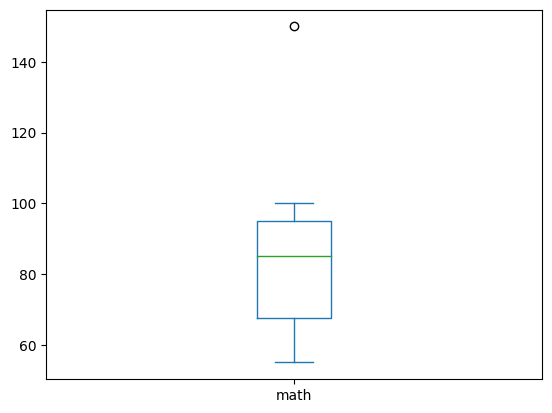

In [18]:
점수.plot.box();

q. 타이타닉 데이터에서 Fare에서 극명하게 이상치로 보이는 행들을 찾으시오 3m

<Axes: >

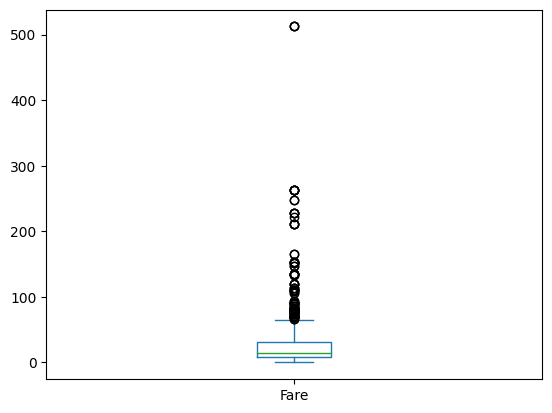

In [19]:
타이타닉['Fare'].plot.box()

In [92]:
타이타닉[타이타닉.Fare > 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
